In [14]:
import pandas as pd

In [15]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [18]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [19]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [20]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('titanic.csv')

# Select relevant variables
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[selected_features]

# Preprocess the data
data = data.dropna()  # Drop rows with missing values for simplicity
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)  # Convert categorical variables to numerical

# Split the data into training, development, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, dev_data = train_test_split(train_data, test_size=0.2, random_state=42)

X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_dev = dev_data.drop('Survived', axis=1)
y_dev = dev_data['Survived']
X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

now, we need a decision tree classifier

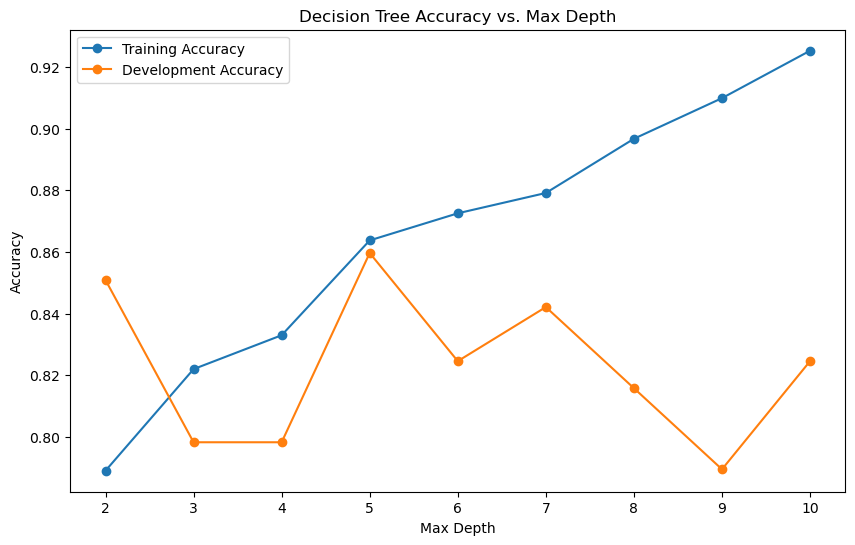

In [22]:
import matplotlib.pyplot as plt

depth_range = range(2, 11)
train_accuracies = []
dev_accuracies = []
trees = []

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    
    train_pred = clf.predict(X_train)
    dev_pred = clf.predict(X_dev)
    
    train_accuracy = accuracy_score(y_train, train_pred)
    dev_accuracy = accuracy_score(y_dev, dev_pred)
    
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)
    trees.append(clf)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_range, dev_accuracies, label='Development Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.legend()
plt.show()


Now we can see best performing model

In [23]:
best_depth = depth_range[dev_accuracies.index(max(dev_accuracies))]
best_model = trees[dev_accuracies.index(max(dev_accuracies))]

# Evaluate the best model on the test set
test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print(f'Best model max_depth: {best_depth}')
print(f'Accuracy on the test set: {test_accuracy}')


Best model max_depth: 5
Accuracy on the test set: 0.7132867132867133


Visualise the decision tree

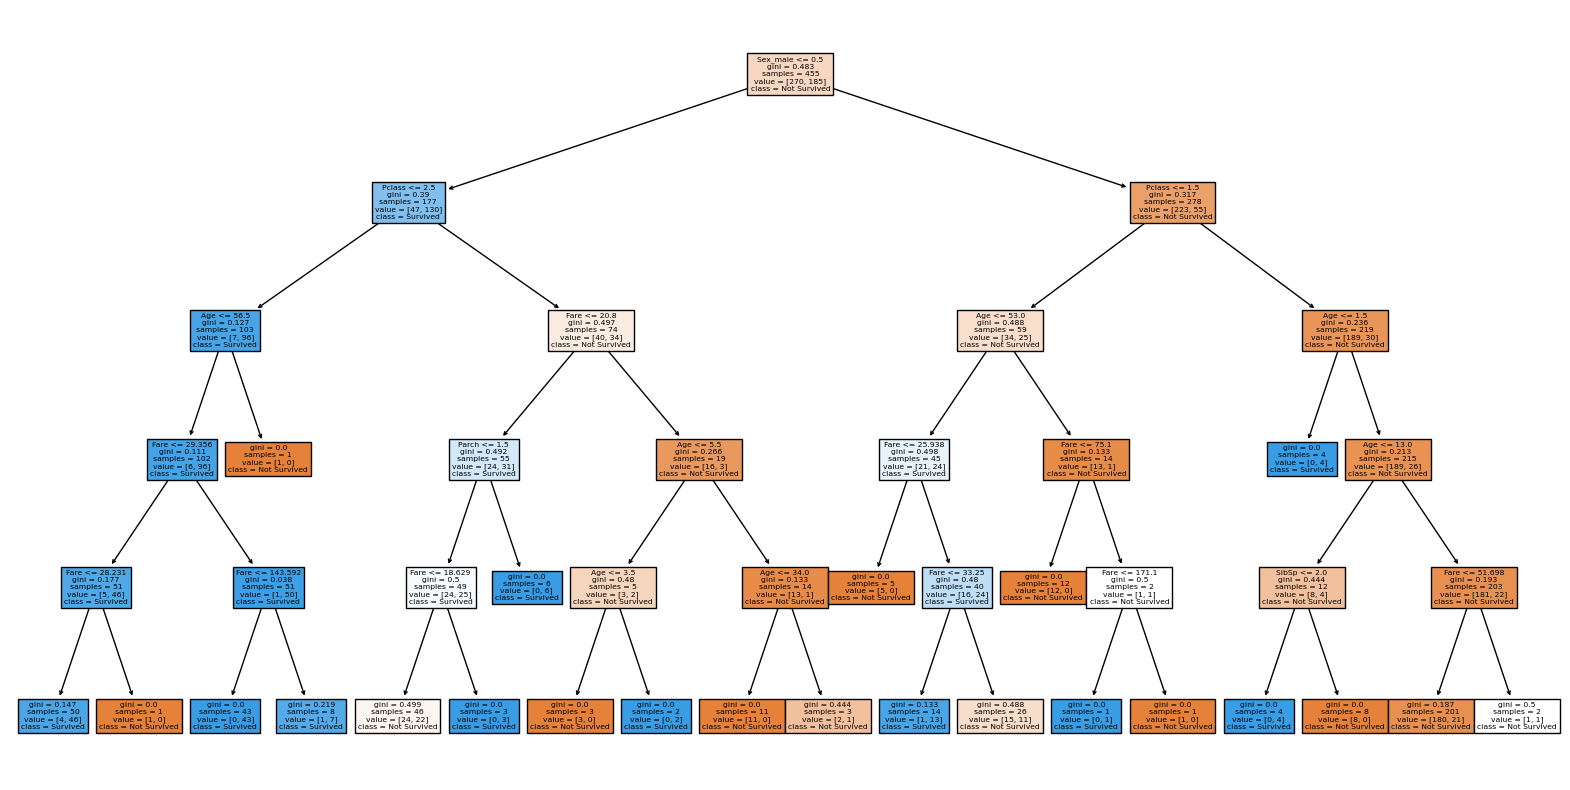

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
